# Introduction

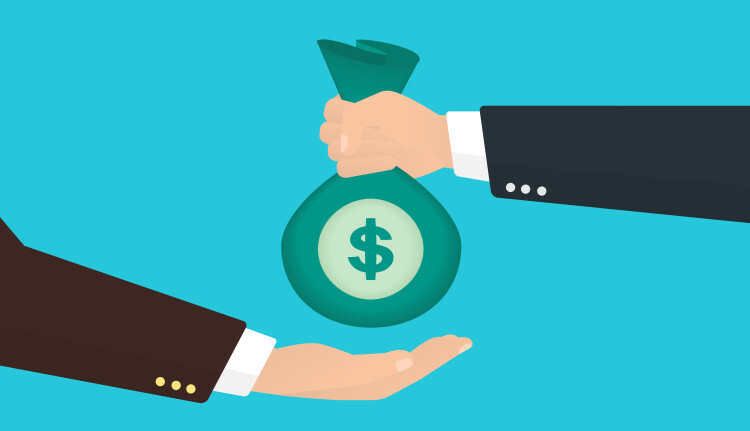

Loans are risky but at the same time it is also a product that generates profits for the institution through differential borrowing/ lending rates.
The ML model should be explainable and be able to balance between risk and profits.   

# The main objective for this dataset:

Using machine learning techniques to predict loan payments.

target value: Loan_Status

# Libraries 📕📗📘

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# File path 📂

In [2]:
df_train=pd.read_csv(r"C:\Users\JJ\Downloads\train.csv")

In [3]:
df_test=pd.read_csv(r"C:\Users\JJ\Downloads\test.csv")

# Data Id 📋

This dataset is named Loan Prediction Dataset . The dataset contains a set of 613 records under 13 attributes:

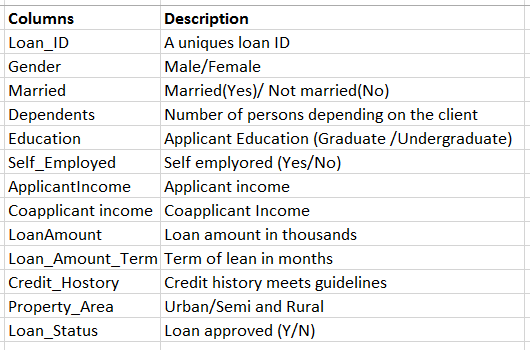

# Understanding the Data

In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}")

training set (row, col): (614, 13)

testing set (row, col): (367, 12)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Preprocessing

In [9]:
#Dropping the unwanted columns from dataset
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('Loan_ID',axis=1,inplace=True)
#checking the new shapes
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}")

training set (row, col): (614, 12)

testing set (row, col): (367, 11)


# Missing values 🚫

In [10]:
#As you can see we have some missing data, let's have a look how many we have for each column:
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [11]:
si_mode = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
si_mode=si_mode.fit(df_train[["Credit_History","Self_Employed","Dependents","Gender","Married"]])
df_train[["Credit_History","Self_Employed","Dependents","Gender","Married"]] = si_mode.transform(df_train[["Credit_History","Self_Employed","Dependents","Gender","Married"]])

In [12]:
si_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
si_mean=si_mean.fit(df_train[["LoanAmount","Loan_Amount_Term"]])
df_train[["LoanAmount","Loan_Amount_Term"]] = si_mean.transform(df_train[["LoanAmount","Loan_Amount_Term"]])
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df_test[["LoanAmount","Loan_Amount_Term"]]=si_mean.transform(df_test[["LoanAmount","Loan_Amount_Term"]])
df_test[["Credit_History","Self_Employed","Dependents","Gender","Married"]] = si_mode.transform(df_test[["Credit_History","Self_Employed","Dependents","Gender","Married"]])
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [14]:
#list of all the numeric columns
num = df_train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df_train.select_dtypes('object').columns.to_list()

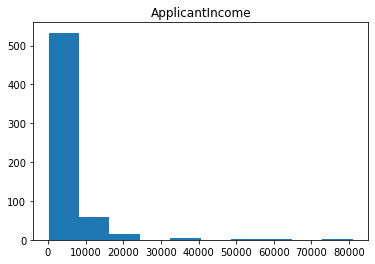

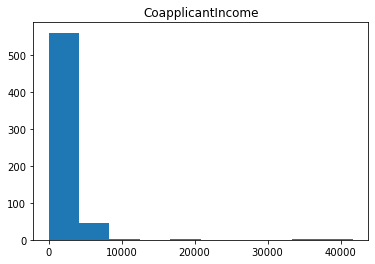

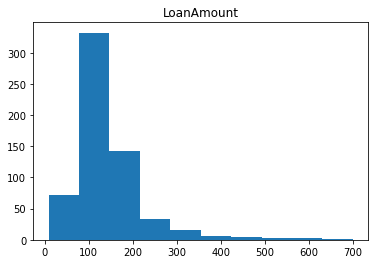

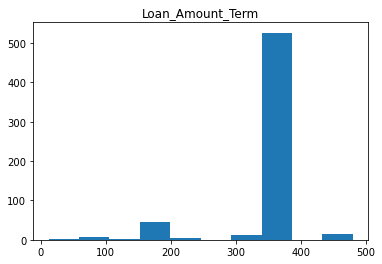

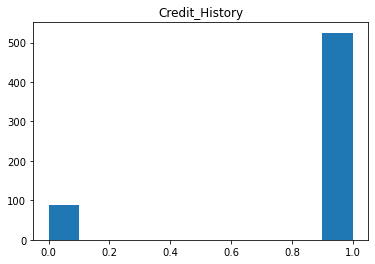

In [15]:
for i in num:
    plt.hist(df_train[i])
    plt.title(i)
    plt.show()

<AxesSubplot:ylabel='Loan_Status'>

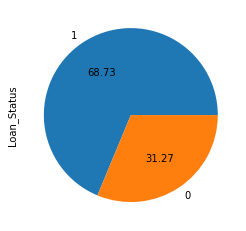

In [64]:
df_train["Loan_Status"].value_counts().plot(kind="pie",autopct="%0.2f")

# Encoding data to numeric

In [17]:
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

df_train["Dependents"]=df_train["Dependents"].replace("3+","3")
df_test["Dependents"]=df_test["Dependents"].replace("3+","3")

# convertind the Dependents column
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)


# dropping the previous Dependents column
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

# adding the new numeric values from the to_numeric variable to both datasets
df_train = df_train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
df_test = df_test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


# checking the our manipulated dataset for validation
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}\n")
print(df_train.info(), "\n\n", df_test.info())

training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 column

# Correlation matrix

<AxesSubplot:>

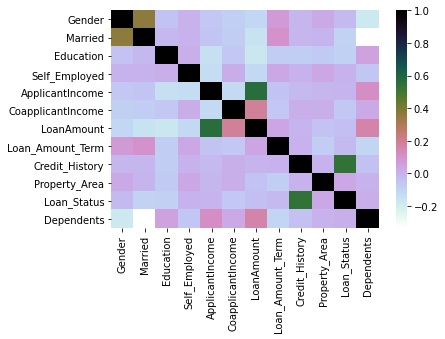

In [18]:
#plotting the correlation matrix
sns.heatmap(df_train.corr() ,cmap='cubehelix_r')

In [19]:
#correlation table
corr = df_train.corr()
corr.style.background_gradient().set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.08,-0.07,-0.07,-0.09,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.12,0.03,0.00,0.03,0.00,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.12,0.57,0.19,1.00,0.04,-0.00,-0.04,-0.04,0.16
Loan_Amount_Term,0.07,0.10,-0.08,0.03,-0.05,-0.06,0.04,1.00,0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.04,-0.08,0.00,1.00,0.03,-0.00


We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.54). Therefore our target value is highly dependant on this column

In [20]:
df_train["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [21]:
df_train.groupby(df_train["Credit_History"])["Loan_Status"].sum()

Credit_History
0.0      7
1.0    415
Name: Loan_Status, dtype: int64

# Model Building  ✔

##### Models we will use:

* **Decision Tree** 
* **Random Forest**
* **Logistic Regression**
* **Naive Bayes**
##### The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting Loan Status

4. Classification report by Loan Status

5. Overall accuracy

In [31]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Decision Tree

In [32]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

#Confusion Matrix
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        51
           1       0.84      0.84      0.84       134

    accuracy                           0.76       185
   macro avg       0.70      0.70      0.70       185
weighted avg       0.76      0.76      0.76       185

76.22% Accurate
[[ 29  22]
 [ 22 112]]


## Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_predict = NB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
NB_SC = accuracy_score(y_predict,y_test)
print(f"{round(NB_SC*100,2)}% Accurate")

#Confusion Matrix
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57        51
           1       0.82      0.97      0.89       134

    accuracy                           0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185

82.16% Accurate
[[ 22  29]
 [  4 130]]


## Random Forest

In [34]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

#Confusion Matrix
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54        51
           1       0.81      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.68      0.70       185
weighted avg       0.78      0.79      0.78       185

79.46% Accurate
[[ 22  29]
 [  9 125]]


## Logistic Regression

In [78]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

#Confusion Matrix
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

accuracy is 0.8324324324324325
[[ 22  29]
 [  2 132]]


C:\Users\JJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Ensemble Learning

In [76]:
clf = VotingClassifier(estimators=[('clf1', LR), ('clf2', RF), ('clf3', DT),('clf4', NB)],
                        voting='soft', weights=[2,2,1,2])

clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
EV_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

#Confusion Matrix
print(confusion_matrix(y_test,y_predict))

C:\Users\JJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.43      0.58        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185

accuracy is 0.827027027027027
[[ 22  29]
 [  3 131]]


# Observation 👀

In [79]:
score = [DT_SC,RF_SC,LR_SC,NB_SC,EV_SC]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Naive Bayes","Random Forest", "Logistic Regression","Ensemble"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)  

,Model,Score
2,Random Forest,0.832432
4,Ensemble,0.827027
3,Logistic Regression,0.821622
1,Naive Bayes,0.794595
0,Decision Tree,0.762162


##This model will help you predict whether the applicant is defaulter or not....